In [5]:
import numpy as np
data = np.loadtxt("CAGiGrav.txt", delimiter="\t", skiprows=1)
data

array([[ 5.71196718e+04, -2.23121080e+02,  2.42450000e-01,
        -5.50727000e+00],
       [ 5.71196737e+04, -2.18467240e+02,  2.26360000e-01,
        -1.53011900e+01],
       [ 5.71196758e+04, -1.98853980e+02,  2.09080000e-01,
        -1.12091400e+01],
       ...,
       [ 5.71465111e+04, -8.37270580e+02,  9.08840000e-01,
        -2.10665100e+01],
       [ 5.71465131e+04, -8.24011700e+02,  9.05520000e-01,
        -1.07919500e+01],
       [ 5.71465152e+04, -8.21298980e+02,  9.01570000e-01,
        -1.16263700e+01]])

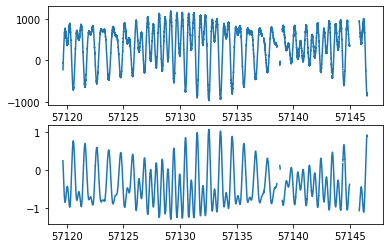

In [17]:
import matplotlib.pyplot as plt

temps = data[:,0]
cag = data[:,1]
grav = data[:,2]
res = data[:,3]

plt.subplot(2, 1, 1)
plt.plot(temps, cag)
plt.subplot(2, 1, 2)
plt.plot(temps, grav)

In [22]:
mask = ~(np.isnan(cag) | np.isnan(grav))
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
temps = temps[mask]
cag = cag[mask]
grav = grav[mask]
res = res[mask]

In [27]:
moyenne = np.mean(cag)
ecart_type = np.std(cag)

print(f"La moyenne est : {moyenne:.2f} nm/s² et l'écart-type est {ecart_type:.2f} nm/s².")

La moyenne est : 356.90 nm/s² et l'écart-type est 464.60 nm/s².


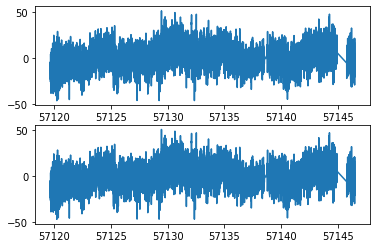

In [31]:
K = -898.25
mesures = grav*K
diff = cag - mesures
plt.subplot(2, 1, 1)
plt.plot(temps, diff)
plt.subplot(2, 1, 2)
plt.plot(temps, res)


In [36]:
ec_res = np.std(res)
print(f"L'écart-type des résidus est {ec_res:.1f} nm/s², contre {ecart_type:.1f} nm/s² pour la mesure du CAG.")

L'écart-type des résidus est 11.8 nm/s², contre 464.6 nm/s² pour la mesure du CAG.


In [41]:
def allan_variance(x):
    ecart = (x[1:] - x[:-1])**2
    return np.sqrt(np.mean(ecart)/2)
allan_variance(cag)

13.520198523140717